# ANÁLISIS DE COVID-19 TWEETS

## Importación de las librerias

Importamos las librerias necesarias para la realización del ejercicio.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

print('Setup complete.')

Setup complete.


## Visualización del dataset

Comenzamos con la lectura del csv ubicado en la carpeta data. Tras ello, mediante .head() se imprimirán las primeras filas del csv.

In [2]:
df_tweets = pd.read_csv('data/covid19_tweets.csv')

In [3]:
df_tweets.head()

user_name         user_location  \
0           ᏉᎥ☻լꂅϮ            astroworld   
1    Tom Basile 🇺🇸          New York, NY   
2  Time4fisticuffs      Pewee Valley, KY   
3      ethel mertz  Stuck in the Middle    
4         DIPR-J&K     Jammu and Kashmir   

                                    user_description         user_created  \
0  wednesday addams as a disney princess keepin i...  2017-05-26 05:46:42   
1  Husband, Father, Columnist & Commentator. Auth...  2009-04-16 20:06:23   
2  #Christian #Catholic #Conservative #Reagan #Re...  2009-02-28 18:57:41   
3  #Browns #Indians #ClevelandProud #[]_[] #Cavs ...  2019-03-07 01:45:06   
4  🖊️Official Twitter handle of Department of Inf...  2017-02-12 06:45:15   

   user_followers  user_friends  user_favourites  user_verified  \
0             624           950            18775          False   
1            2253          1677               24           True   
2            9275          9525             7254          False   
3             197           987             1488          False   
4          101009           168              101          False   

                  date                                               text  \
0  2020-07-25 12:27:21  If I smelled the scent of hand sanitizers toda...   
1  2020-07-25 12:27:17  Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2  2020-07-25 12:27:14  @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3  2020-07-25 12:27:10  @brookbanktv The one gift #COVID19 has give me...   
4  2020-07-25 12:27:08  25 July : Media Bulletin on Novel #CoronaVirus...   

                            hashtags               source  is_retweet  
0                                NaN   Twitter for iPhone       False  
1                                NaN  Twitter for Android       False  
2                        ['COVID19']  Twitter for Android       False  
3                        ['COVID19']   Twitter for iPhone       False  
4  ['CoronaVirusUpdates', 'COVID19']  Twitter for Android       False

In [4]:
round(df_tweets.describe(), 0)

user_followers  user_friends  user_favourites
count        179108.0      179108.0         179108.0
mean         109056.0        2122.0          14444.0
std          841467.0        9163.0          44523.0
min               0.0           0.0              0.0
25%             172.0         148.0            206.0
50%             992.0         542.0           1791.0
75%            5284.0        1725.0           9388.0
max        49442559.0      497363.0        2047197.0

A continuación, a través de esta función veremos el tipo de datos de cada columna. Es decir, si son: float, int64, object, etc.

In [5]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


Para poder hacerlo manipulable. Sería conveniente convertir la columna date en una datetime64, ya que haciendo esto se podrían hacer operaciones matemáticas y estadísticas en las fechas propuestas.

In [6]:
df_tweets['date'] = df_tweets['date'].astype('datetime64')

In [7]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_name         179108 non-null  object        
 1   user_location     142337 non-null  object        
 2   user_description  168822 non-null  object        
 3   user_created      179108 non-null  object        
 4   user_followers    179108 non-null  int64         
 5   user_friends      179108 non-null  int64         
 6   user_favourites   179108 non-null  int64         
 7   user_verified     179108 non-null  bool          
 8   date              179108 non-null  datetime64[ns]
 9   text              179108 non-null  object        
 10  hashtags          127774 non-null  object        
 11  source            179031 non-null  object        
 12  is_retweet        179108 non-null  bool          
dtypes: bool(2), datetime64[ns](1), int64(3), object(7)
memory u

## Limpieza del dataset

La limpieza del dataset es sumamanete importante a la hora de analizar los datos para que no haya errores.

### Datos vacios

Primero realizaremos la comprobación para ver si hay datos vacios, para que sean eliminados.

In [8]:
df_tweets.isnull().sum()

user_name               0
user_location       36771
user_description    10286
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            51334
source                 77
is_retweet              0
dtype: int64

In [9]:
df_tweets_f2 = df_tweets.dropna()

**COMPROBACIÓN**

In [10]:
df_tweets_f2.isnull().values.any()

False

### Datos duplicados

In [11]:
total_duplicates = df_tweets_f2.duplicated().sum()
if total_duplicates == 0:
    print('No hay datos duplicados.')
else:
    print('Total duplicados:', total_duplicates)

No hay datos duplicados.


## Análisis mediante gráficas

In [12]:
df_tweets_f2.head()

user_name         user_location  \
2   Time4fisticuffs      Pewee Valley, KY   
3       ethel mertz  Stuck in the Middle    
4          DIPR-J&K     Jammu and Kashmir   
5  🎹 Franz Schubert           Новоро́ссия   
6      hr bartender       Gainesville, FL   

                                    user_description         user_created  \
2  #Christian #Catholic #Conservative #Reagan #Re...  2009-02-28 18:57:41   
3  #Browns #Indians #ClevelandProud #[]_[] #Cavs ...  2019-03-07 01:45:06   
4  🖊️Official Twitter handle of Department of Inf...  2017-02-12 06:45:15   
5  🎼  #Новоро́ссия #Novorossiya #оставайсядома #S...  2018-03-19 16:29:52   
6  Workplace tips and advice served up in a frien...  2008-08-12 18:19:49   

   user_followers  user_friends  user_favourites  user_verified  \
2            9275          9525             7254          False   
3             197           987             1488          False   
4          101009           168              101          False   
5            1180          1071             1287          False   
6           79956         54810             3801          False   

                 date                                               text  \
2 2020-07-25 12:27:14  @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3 2020-07-25 12:27:10  @brookbanktv The one gift #COVID19 has give me...   
4 2020-07-25 12:27:08  25 July : Media Bulletin on Novel #CoronaVirus...   
5 2020-07-25 12:27:06  #coronavirus #covid19 deaths continue to rise....   
6 2020-07-25 12:27:03  How #COVID19 Will Change Work in General (and ...   

                            hashtags               source  is_retweet  
2                        ['COVID19']  Twitter for Android       False  
3                        ['COVID19']   Twitter for iPhone       False  
4  ['CoronaVirusUpdates', 'COVID19']  Twitter for Android       False  
5         ['coronavirus', 'covid19']      Twitter Web App       False  
6          ['COVID19', 'Recruiting']               Buffer       False

### Tweets por día

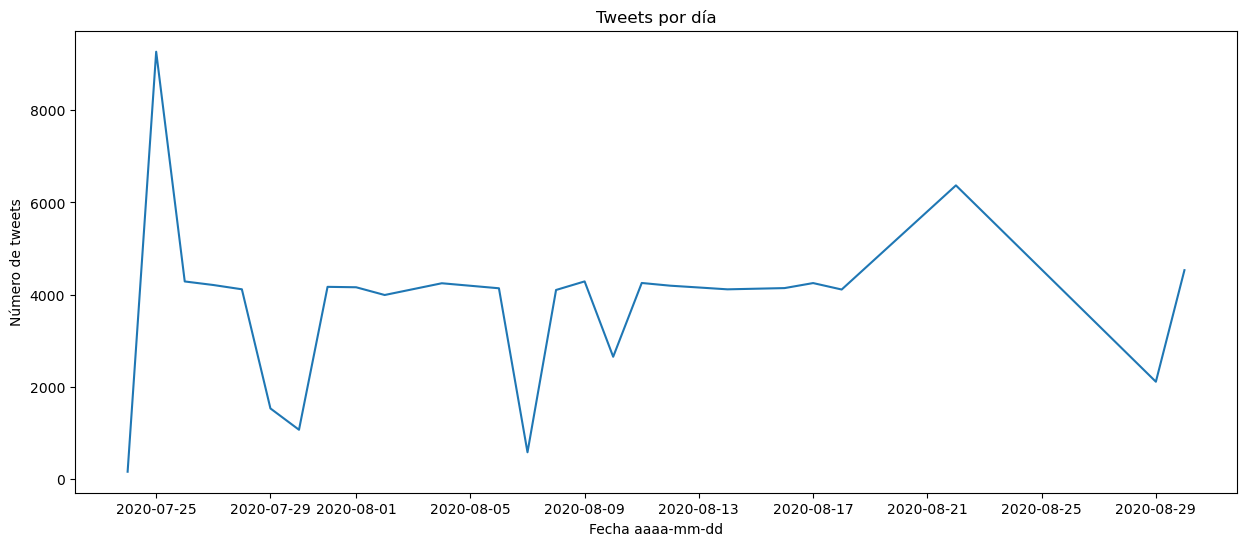

In [13]:
counts = df_tweets_f2.groupby(df_tweets_f2['date'].dt.date)['text'].count() #mediante groupby agrupamos por fecha y contamos el número de tweets

plt.figure(figsize=(15, 6))
plt.plot(counts.index, counts.values)
plt.xlabel('Fecha aaaa-mm-dd')
plt.ylabel('Número de tweets')
plt.title('Tweets por día')
plt.savefig('imagenes/recuentos_tweets.png')
plt.show()

### Hashtags más utilizados

In [14]:
hashtag_counts = df_tweets_f2['hashtags'].value_counts()
print(hashtag_counts)

['COVID19']                       30054
['Covid19']                        3838
['covid19']                        2368
['coronavirus']                     442
['COVID19', 'coronavirus']          407
                                  ...  
['golf', 'COVID19']                   1
['covid19', 'PedsICU', 'ecmo']        1
['COVID19', 'SODEIT']                 1
['Broadway']                          1
['covid19', 'world']                  1
Name: hashtags, Length: 41709, dtype: int64


A continuación de todos ellos, seleccionaremos los 10 más utilizados.

In [15]:
top_hashtags = hashtag_counts[:10]

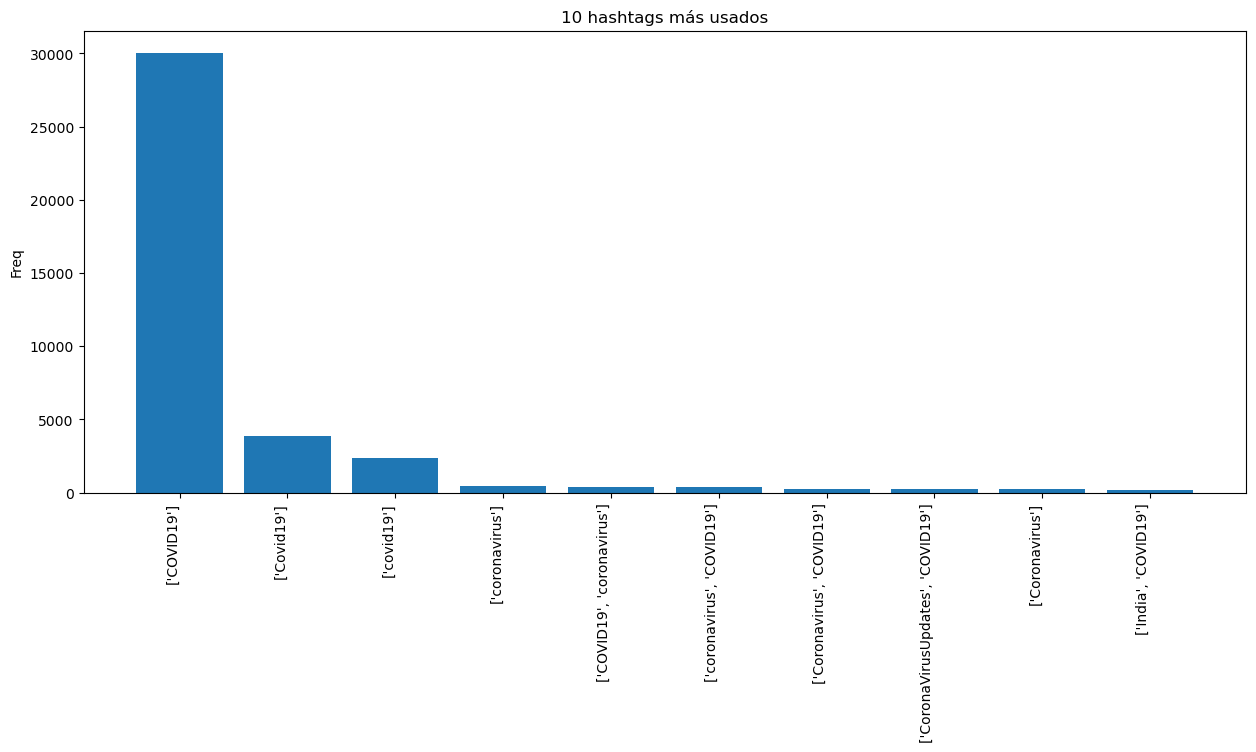

In [16]:
fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(top_hashtags.index, top_hashtags.values)

ax.set_title('10 hashtags más usados')
ax.set_ylabel('Freq')
plt.xticks(rotation=90, ha="right")
plt.savefig('imagenes/hashtags_usados.png')

plt.show()